# Clustering temporal factors across days

In [5]:
import numpy as np
import flow
from cascade import paths
import os
import matplotlib.pyplot as plt
from munkres import Munkres
from scipy.cluster import hierarchy

### load tensors

In [6]:
method = 'ncp_bcd'
trace_type = 'zscore_day'
mouse = 'OA27'
cs = ''
warp=False
pars = {'trace_type': trace_type, 'cs': cs, 'warp': warp}
word = 'belgium'
days = flow.DateSorter.frommeta(mice=[mouse], tags=None)

temp_factors = []
day_num = []
for c, day1 in enumerate(days, 0):
    try:
        day2 = days[c+1]
    except IndexError:
        print('done.')
        break

    # create folder structure if needed
    # load
#     out_dir = os.path.join(flow.paths.outd, str(day1.mouse))
#     if not os.path.isdir(out_dir):
#         os.mkdir(out_dir)
#     load_dir = os.path.join(out_dir, 'tensors paired ' + str(trace_type))
#     if not os.path.isdir(load_dir):
#         os.mkdir(load_dir)
#     tensor_path = os.path.join(load_dir, str(day1.mouse) + '_' + str(day1.date)
#                      + '_' + str(day2.date) + '_pair_decomp_' + str(trace_type) + '.npy')

    # load
    load_dir = paths.tca_path(mouse, 'pair', pars=pars, word=word)
    tensor_path = os.path.join(load_dir, str(day1.mouse) + '_' + str(day1.date)
                     + '_' + str(day2.date) + '_pair_decomp_' + str(trace_type) + '.npy')
    if not os.path.isfile(tensor_path): continue
    # save
#     ana_dir = os.path.join(flow.paths.graphd, str(day1.mouse))
#     if not os.path.isdir(ana_dir):
#         os.mkdir(ana_dir)
#     save_dir = os.path.join(ana_dir, 'tensors paired ' + str(trace_type))
#     if not os.path.isdir(save_dir):
#         os.mkdir(save_dir)
#     save_dir = os.path.join(save_dir, 'qc')
#     if not os.path.isdir(save_dir):
#         os.mkdir(save_dir)
#     error_path = os.path.join(save_dir, str(day1.mouse) + '_' + str(day1.date)
#                      + '_' + str(day2.date) + '_error.png')
#     sim_path = os.path.join(save_dir, str(day1.mouse) + '_' + str(day1.date)
#                      + '_' + str(day2.date) + '_similarity.png')
    
    # load your data
    ensemble = np.load(tensor_path)
    ensemble = ensemble.item()
    V = ensemble[method]
    temp = V.results[8][0].factors[1]
    
    for f in range(np.shape(temp)[1]):
        temp_factors.append(temp[:,f])
        day_num.append(c+1)
    

done.


In [13]:
np.shape(V.results[8][0].factors[0])

(107, 8)

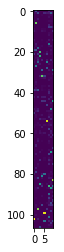

In [37]:
plt.imshow(V.results[10][0].factors[0])

(107, 108)
(107, 107)


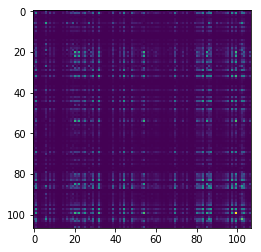

In [27]:
test_img = np.dot(V.results[10][0].factors[0],V.results[10][0].factors[1].T)
print(np.shape(test_img))
print(np.shape(np.dot(test_img, test_img.T)))
plt.imshow(np.dot(test_img, test_img.T))


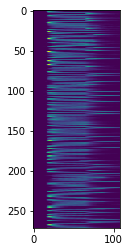

In [7]:
fac_array = np.array(temp_factors)
plt.imshow(fac_array)

In [35]:
dim0sort

array([ 30,  78,  13,  47,  41,  74,  88,   3,  36,  71,  12,  65,  96,
        76,  63,  84,  11,  15,  34,  35,  55,  38,  68,   9, 105,  72,
         2,   7,  89, 100,   4,  45,  77,  43,  37,  57,  62,  23,  64,
         5,  40,  31,  52,  66,  51,  91,  17,  26,  59,  33,  58,  92,
        67,  14, 104,  61,  93,  50,  98,  49,  56,  79,  60,  75,  73,
        10,  70,  46,  90,  94, 101,   8,  24,  82, 106,   0,  42,  28,
        53,  18,  16,  21,  81,  19,  95,  27,  39,  48,  69,  80,  29,
       103,   1,  25,  87,  86,  44,   6,  22,  85,  97,  83,  32,  20,
        54, 102,  99])

(107, 107)
(107,)


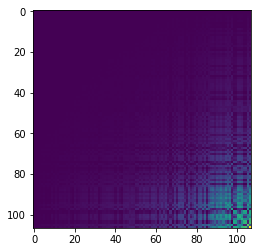

In [36]:
comparison = np.dot(test_img, test_img.T)
print(np.shape(comparison))
dim0sort = np.argsort(np.max(comparison,0))
dim1sort = np.argsort(np.max(comparison,1))
print(np.shape(comparison[dim0sort,dim1sort]))
sorted0 = comparison[dim0sort,:]
sorted1 = sorted0[:, dim1sort]
plt.imshow(sorted1)

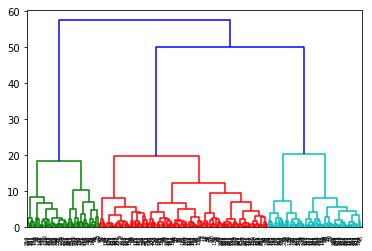

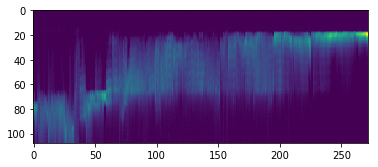

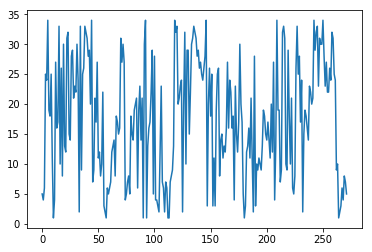

In [55]:
Z = hierarchy.ward(fac_array)
order = hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(Z, fac_array))
order = np.array([int(o) for o in order]).flatten()
day_array = np.array(day_num)
# new_facs = np.zeros(np.shape(fac))
plt.figure()
hierarchy.dendrogram(Z)
plt.figure()
plt.imshow(fac_array[order, :].T)
plt.figure()
plt.plot(day_array[order])
# plt.figure()
# for i in range(272):
#     plt.plot()

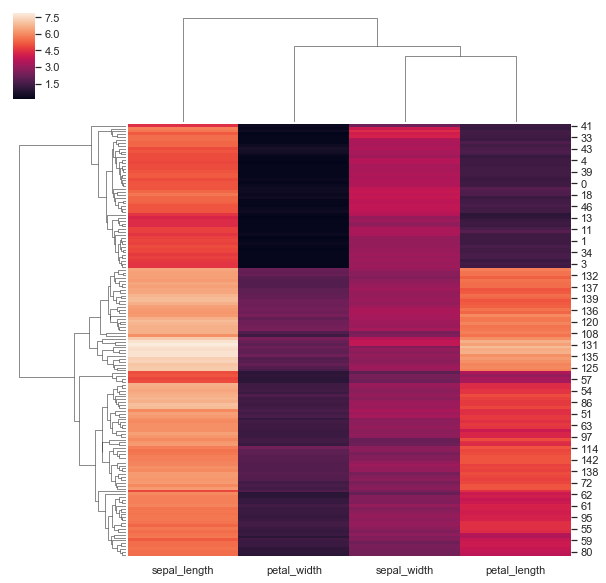

In [8]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris)

In [9]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
